In [1]:
from dataloader import load_data_one_hot_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

In [2]:
root_folder = "./"
file_name = "final_merged_df_sw500.csv"

train_losses_bs = {}
train_accuracies_bs = {}
val_losses_bs = {}
val_accuracies_bs = {}
test_accuracies_bs = {}
for bs in [32, 64, 128]:
    print(f"Training for batch_size={bs}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_one_hot_encoded(root_folder, file_name, num_steps=100, batch_size=bs)

    model = SNNModelSimple(num_features, num_outputs, beta=0.99)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_bs[bs] = train_losses
    train_accuracies_bs[bs] = train_accuracies
    val_losses_bs[bs] = val_losses
    val_accuracies_bs[bs] = val_accuracies

    test_accuracies_bs[bs] = evaluate_model(model, test_loader, encoding="one-hot")

out_file_name = 'exp6_mse_beta_099_bs_32_128_ep_10_T_100.pkl' 
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_bs, "train_accuracies": train_accuracies_bs, "val_losses": val_losses_bs, "val_accuracies": val_accuracies_bs, "test_accuracies": test_accuracies_bs}, f)


Training for batch_size=32
Epoch 1/10, Train Loss: 0.0631, Train Accuracy: 33.33%, Val Loss: 225.7292, Val Accuracy: 37.20%, Time: 136.77s
Epoch 2/10, Train Loss: 0.0599, Train Accuracy: 38.22%, Val Loss: 227.6189, Val Accuracy: 39.30%, Time: 139.13s
Epoch 3/10, Train Loss: 0.0591, Train Accuracy: 39.43%, Val Loss: 241.4332, Val Accuracy: 39.73%, Time: 136.52s
Epoch 4/10, Train Loss: 0.0586, Train Accuracy: 40.25%, Val Loss: 242.0514, Val Accuracy: 39.96%, Time: 136.71s
Epoch 5/10, Train Loss: 0.0583, Train Accuracy: 40.59%, Val Loss: 233.9523, Val Accuracy: 40.11%, Time: 136.41s
Epoch 6/10, Train Loss: 0.0580, Train Accuracy: 41.20%, Val Loss: 260.7745, Val Accuracy: 40.71%, Time: 136.43s
Epoch 7/10, Train Loss: 0.0579, Train Accuracy: 41.41%, Val Loss: 244.1581, Val Accuracy: 41.30%, Time: 140.12s
Epoch 8/10, Train Loss: 0.0576, Train Accuracy: 41.83%, Val Loss: 260.8640, Val Accuracy: 41.03%, Time: 137.89s
Epoch 9/10, Train Loss: 0.0575, Train Accuracy: 42.03%, Val Loss: 246.6457, V

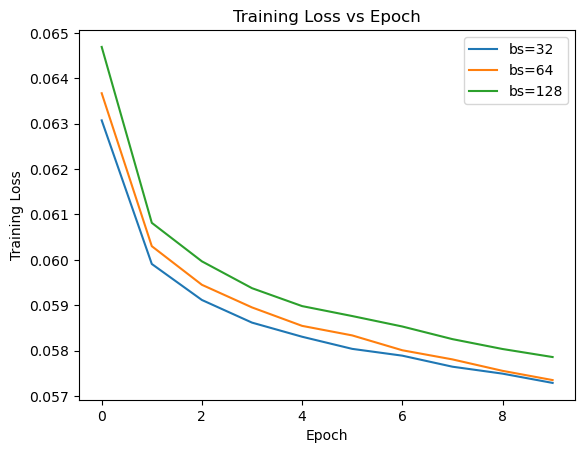

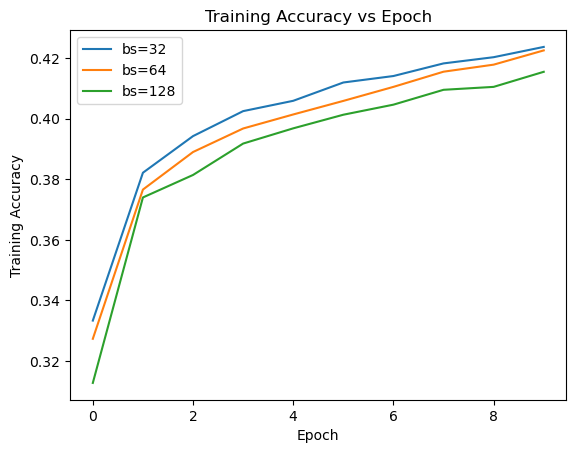

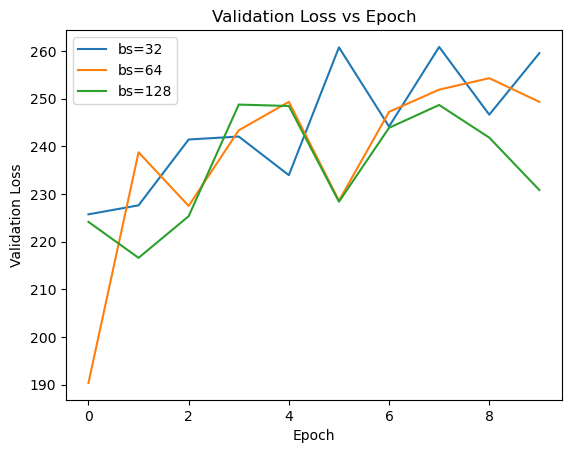

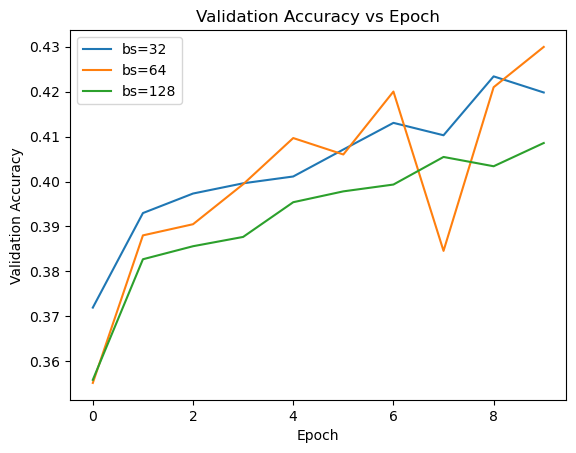

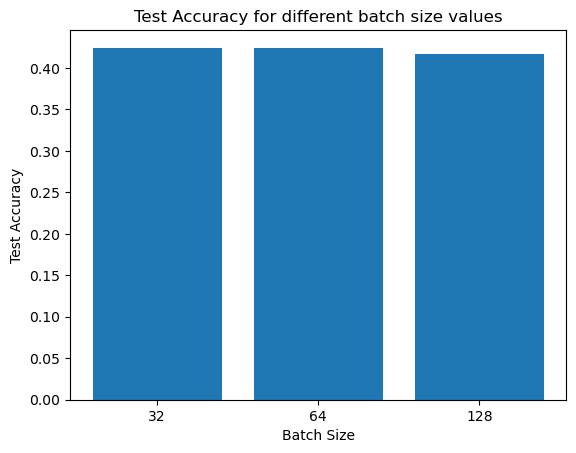

In [3]:
batch_size = [32, 64, 128]

plt.figure()
for bs in batch_size:
    plt.plot(train_losses_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch") 
    plt.ylabel("Training Loss")
    plt.legend()
    plt.title("Training Loss vs Epoch")

plt.figure()
for bs in batch_size:
    plt.plot(train_accuracies_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.legend()
    plt.title("Training Accuracy vs Epoch")

plt.figure()
for bs in batch_size:
    plt.plot(val_losses_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.legend()
    plt.title("Validation Loss vs Epoch")

plt.figure()
for bs in batch_size:
    plt.plot(val_accuracies_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.title("Validation Accuracy vs Epoch")

plt.figure()
plt.bar([str(bs) for bs in batch_size], [test_accuracies_bs[bs] for bs in batch_size])
plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy for different batch size values")
plt.show()